# SARS-CoV-2 Surface Glycoprotein Amino Acid Sequence Analysis

*November 15, 2020*
<img src="spike_protein.gif" alt="spike protein" width="250"/>
<div align="center" style="margin-top: 10px; color:gray;"><i><small>proteopedia.org &nbsp;&nbsp;&nbsp;&nbsp;</small></i></div>

## Part 1: Analysis of SARS-CoV-2 Surface Glycoprotein Mutations in Subsequent Waves of COVID-19 Infections in the United States

Mutations in the surface glycoprotein (spike protein) of the SARS-CoV-2 genome present a concerning problem for scientists, researchers, and public health experts around the world. 
* The surface glycoprotein is the main target for many vaccine candidates, and mutations can potentially lead to changes in shape that will greatly reduce the effectiveness of current vaccine candidates. 
* Additionally, [previous analyses](https://www.sciencedirect.com/science/article/pii/S0092867420308205) of the SARS-CoV-2 genome have identified multiple mutations that have potentially increased the virus’s infectiousness, and additional mutations to the genome can further increase its infectiousness or mortality rate and drastically shift the course of the COVID-19 pandemic. 
* The recent alarming rise of COVID-19 cases in the United States presents the need for a better understanding of the SARS-CoV-2 genome and its new mutations.

Thus, the first part of my project seeks to analyze and compare the mutations in the SARS-CoV-2 surface glycoprotein in the three waves of COVID-19 infections that have occurred in the United States, spanning from January to November 2020. 

## Part 2: Clustering of SARS-CoV-2 Surface Glycoprotein Amino Acid Sequences from the States of Washington and Florida

* The SARS-CoV-2 surface glycoprotein amino acid sequences recorded in each state can also be analyzed to learn about the relationship between the infection waves of individual states.
* The waves can be compared both within and across states to investigate the progression of mutations in the virus in different locations.

In the second part of my project, I will use unsupervised models to cluster the surface glycoprotein sequences in Washington and Florida to gain a better understanding of the similarities between the respective waves that have occurred in each state. 
<br>
<br>

# Part 1: <br><br>Surface Glycoprotein Mutation Analysis

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**The Data**<br>
Publicly available surface glycoprotein amino acid [sequence data](https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Protein&VirusLineage_ss=SARS-CoV-2,%20taxid:2697049&ProtNames_ss=surface%20glycoprotein) from samples collected during the three COVID-19 waves in the United States was obtained from the [National Center for Biotechnology Information](https://www.ncbi.nlm.nih.gov/) (NCBI) in the FASTA format. 

Wave timing was determined from the [COVID Data Tracker](https://covid.cdc.gov/covid-data-tracker/#trends_dailytrendscases) provided by the Centers for Disease Control and Prevention:
![US Covid Cases Figure](UnitedStatesCDC.png)

* The first wave of COVID-19 infection in the U.S. spanned from April 1, 2020 to April 15, 2020.
* The second wave spanned from July 1, 2020 to July 30, 2020.
* The third wave spanned from September 15, 2020 to the current date of November 15, 2020. 

The SARS-CoV-2 surface glycoprotein [reference sequence](https://www.ncbi.nlm.nih.gov/protein/YP_009724390) (Wuhan, China) was also obtained from NCBI.


By comparing the sequences with the reference sequence, I determined the most prevalent mutations in the SARS-CoV-2 surface glycoprotein from each wave and analyzed them to gain insight into which mutations have become more dominant.

In [2]:
#function for parsing fasta file to obtain only the amino acid (AA) sequences
def obtain_AAs(filename):
    file = open(filename, 'r')
    x = (''.join(file.readlines()).splitlines())
    seqs = [] #list to store AA sequences
    i = 0
    while(i < len(x)):
        if ">" == x[i][0]:
            i += 1
            temp = x[i]
            i += 1
            while(i < len(x) and ">" != x[i][0]):
                temp = temp+x[i]
                i += 1
            seqs.append(temp)
        else:
            i += 1
    file.close()
    return seqs

In [3]:
#obtain reference sequence for SARS-CoV-2 surface glycoprotein
reference = obtain_AAs("reference.fasta")
reference = "".join(reference)

#obtain SARS-CoV-2 surface glycoprotein AA sequences from the three waves
wave1_seqs = obtain_AAs("first_wave.fasta") #wave 1 sequences
wave2_seqs = obtain_AAs("second_wave.fasta") #wave 2 sequences
wave3_seqs = obtain_AAs("third_wave.fasta") #wave 3 sequences

print(len(wave1_seqs), "sequences from the first wave (4/1/2020 - 4/15/2020)")
print(len(wave2_seqs), "sequences from the second wave (7/1/2020 - 7/30/2020)")
print(len(wave3_seqs), " sequences from the third wave (9/15/2020 - 11/15/2020)")

2212 sequences from the first wave (4/1/2020 - 4/15/2020)
1087 sequences from the second wave (7/1/2020 - 7/30/2020)
517  sequences from the third wave (9/15/2020 - 11/15/2020)


In [4]:
reference_length = len(reference)
print("Reference sequence has a length of", reference_length, "amino acids")

Reference sequence has a length of 1273 amino acids


In [5]:
#function to check that all sequences are the same length as the reference
def check_length(sequences: list, reference_length: int) -> None:
    positions = []
    for i in range(0, len(sequences)):
        if len(sequences[i]) != reference_length:
            positions.append(i)
    if(len(positions) != 0):
        print("Sequence(s) at position(s)", positions, "do not match the reference length.")
    else:   
        print("All sequence lengths match the reference length!")
    return

In [6]:
#check to make sure all sequences are of the same length as the reference
check_length(wave1_seqs, reference_length)
check_length(wave2_seqs, reference_length)
check_length(wave3_seqs, reference_length)

All sequence lengths match the reference length!
All sequence lengths match the reference length!
All sequence lengths match the reference length!


### Obtaining Mutations
Getting mutations from all samples in each of the 3 infection waves by comparing each sequence to the reference sequence

In [7]:
#function takes in AA sequences and reference sequence
#outputs all mutations as a pandas series
def obtain_mutations(sequences: list, ref_seq: int) -> pd.Series:
    mutations = []
    for seq in sequences:
        for i in range(len(seq)):
            if(ref_seq[i] != seq[i] and seq[i] != 'X'): #X represents unknown AA and is therefore ignored
                mutations.append(ref_seq[i]+str(i+1)+seq[i]) #mutation positions are recorded with 1-based indexing
    return pd.Series(mutations)

In [8]:
#obtain mutations from each wave
mutations1 = obtain_mutations(wave1_seqs, reference) #wave 1 mutations
mutations2 = obtain_mutations(wave2_seqs, reference) #wave 2 mutations
mutations3 = obtain_mutations(wave3_seqs, reference) #wave 3 mutations

### Analyzing Mutations by Infection Wave

In [9]:
print("Mutations in the", len(wave1_seqs), "sequences from the FIRST WAVE in the US:\n")
ave_mut1 = mutations1.value_counts().sum()/len(wave1_seqs)
print("Average mutations per sequence:", ave_mut1)
print("Number of unique mutation types:", mutations1.unique().size)

print("\nTop 10 Most Common Mutations and Their Respective Proportions:")
print(mutations1.value_counts(normalize=True).head(10)*100) 

Mutations in the 2212 sequences from the FIRST WAVE in the US:

Average mutations per sequence: 0.9923146473779385
Number of unique mutation types: 130

Top 10 Most Common Mutations and Their Respective Proportions:
D614G     82.779043
A845D      2.186788
P1263L     1.913440
T859I      1.093394
L5F        1.093394
P681L      0.728929
D138H      0.683371
E554D      0.637813
N149Y      0.364465
Q14H       0.318907
dtype: float64


In [10]:
print("Mutations in the", len(wave2_seqs), "sequences from the SECOND WAVE in the US:\n")
ave_mut2 = mutations2.value_counts().sum()/len(wave2_seqs)
print("Average mutations per sequence:", ave_mut2)
print("Number of unique mutation types:", mutations2.unique().size)

print("\nTop 10 Most Common Mutations and Their Respective Proportions:")
print(mutations2.value_counts(normalize=True).head(10)*100)

Mutations in the 1087 sequences from the SECOND WAVE in the US:

Average mutations per sequence: 1.25114995400184
Number of unique mutation types: 140

Top 10 Most Common Mutations and Their Respective Proportions:
D614G     77.720588
N1187Y     1.176471
L5F        1.102941
D253G      1.029412
Q675R      0.882353
E583D      0.661765
T638A      0.661765
D111N      0.588235
S939F      0.514706
A701V      0.514706
dtype: float64


In [11]:
print("Mutations in the", len(wave3_seqs), "sequences from the THIRD WAVE in the US:\n")
ave_mut3 = mutations3.value_counts().sum()/len(wave3_seqs)
print("Average mutations per sequence:", ave_mut3)
print("Number of unique mutation types:", mutations3.unique().size)

print("\nTop 10 Most Common Mutations and Their Respective Proportions:")
print(mutations3.value_counts(normalize=True).head(10)*100)

Mutations in the 517 sequences from the THIRD WAVE in the US:

Average mutations per sequence: 1.4390715667311411
Number of unique mutation types: 73

Top 10 Most Common Mutations and Their Respective Proportions:
D614G     65.994624
L5F        7.930108
A1070S     2.150538
P681H      2.150538
A1174V     1.881720
Q677H      1.612903
V1040F     1.612903
A67S       1.478495
E780Q      1.209677
L54F       1.209677
dtype: float64


### Some Visualizations for Mutation Analysis

Text(0.5, 1.0, 'Average Mutations Per Surface Glycoprotein Sequence in the US by Wave')

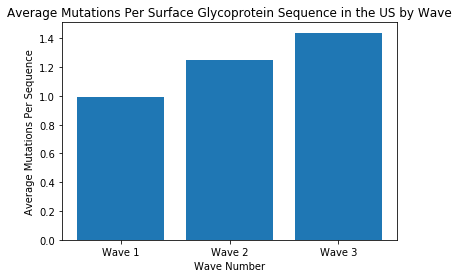

In [12]:
height = [ave_mut1, ave_mut2, ave_mut3]
bars = ('Wave 1', 'Wave 2', 'Wave 3')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Wave Number")
plt.ylabel("Average Mutations Per Sequence")
plt.title("Average Mutations Per Surface Glycoprotein Sequence in the US by Wave")

This plot shows that the more recent waves had a higher average number of amino acid mutations per surface glycoprotein sequence. The average number of mutations in the spike protein from the first wave to the third wave increases from 0.992 to 1.439, demonstrating that as the COVID-19 pandemic has raged on, the SARS-CoV-2 virus has continued to accumulate mutations in its spike protein. 

Text(0.5, 1.0, 'Number of Mutation Types in Surface Glycoprotein in the US by Wave')

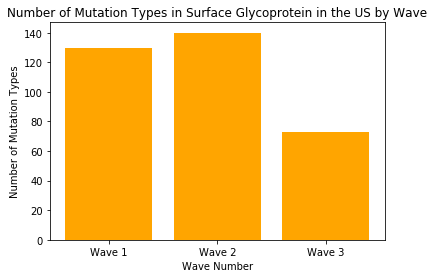

In [13]:
height = [mutations1.unique().size, mutations2.unique().size, mutations3.unique().size]
bars = ('Wave 1', 'Wave 2', 'Wave 3')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = "orange")
plt.xticks(y_pos, bars)
plt.xlabel("Wave Number")
plt.ylabel("Number of Mutation Types")
plt.title("Number of Mutation Types in Surface Glycoprotein in the US by Wave")

This plot shows that the number of unique mutation types increases from wave 1 to wave 2, but decreases from wave 2 to wave 3. This could suggest that the third wave's surface glycoprotein sequence is now converging in the United States. However, the third wave also has much fewer samples than the other two waves due to its recentness in occurrence, which could partially explain the lower number of unique mutations found.

Mutations are in descending order from left to right. The same mutations share the same color.


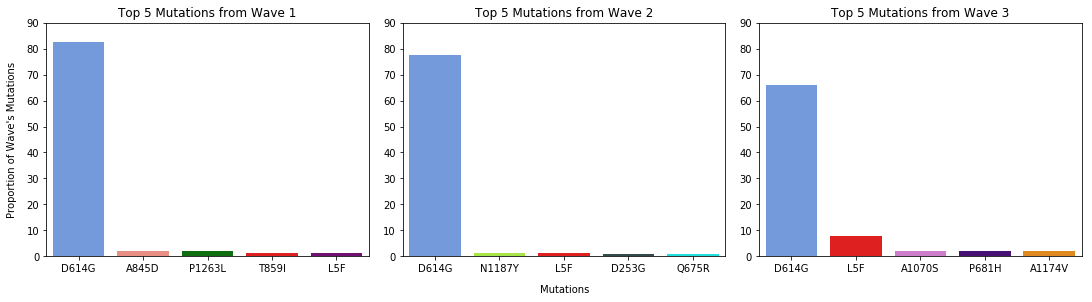

In [14]:
print("Mutations are in descending order from left to right. The same mutations share the same color.")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,4))
clrs1 = ['cornflowerblue','salmon','Green','red', 'Purple']
clrs2 = ['cornflowerblue','greenyellow','red','darkslategrey', 'cyan']
clrs3 = ['cornflowerblue','red','orchid','indigo', 'darkorange']

sns.barplot(x = (mutations1.value_counts(normalize=True).head(5)*100).index, 
            y = mutations1.value_counts(normalize=True).head(5)*100, palette = clrs1,
            ax = ax1).set_title("Top 5 Mutations from Wave 1")
sns.barplot(x = (mutations2.value_counts(normalize=True).head(5)*100).index, 
            y = mutations2.value_counts(normalize=True).head(5)*100, palette = clrs2,
            ax = ax2).set_title("Top 5 Mutations from Wave 2")
sns.barplot(x = (mutations3.value_counts(normalize=True).head(5)*100).index, 
            y = mutations3.value_counts(normalize=True).head(5)*100, palette = clrs3,
            ax = ax3).set_title("Top 5 Mutations from Wave 3")
ax1.set(ylim=(0,90))
ax2.set(ylim=(0,90))
ax3.set(ylim=(0,90))
fig.text(0.508, -0.0305, 'Mutations', ha='center')
fig.text(-0.008, 0.5, 'Proportion of Wave\'s Mutations', va='center', rotation='vertical')
fig.tight_layout()

The plot above shows the 5 most common mutations in the surface glycoprotein from each wave. Amino acid mutation analysis shows that the most common mutation in each of the three waves was **D614G**, which is a mutation from an aspartate to glycine at position 614. This mutation occured much more frequently than any other mutation, and has been found to [increase the virus's infectiousness](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7310631/) by improving its fitness and ability to replicate on human lung epithelial cells and primary airway tissues. 

Another interesting trend is the increasing prevalence of the **L5F** mutation. While only 1.09% of all mutations in the first wave were L5F, 7.93% of all mutations were L5F in the third wave. The most recent samples have the highest prevalence of the L5F mutation, indicating that it may be playing a role in the increased spread of COVID-19 that is currently happening in the third wave. However, more research needs to be conducted on the biochemical and biophysical implications of the L5F mutation on the surface glycoprotein to understand its effects on the virus's infectiousness, mortality, and ability to be targeted by current vaccine candidates and therapeutics. 

# Part 2: <br><br>Surface Glycoprotein Sequence Clustering

In [15]:
import datetime
import csv
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

**The Data**<br>
All surface glycoprotein sequences from [Washington](https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Protein&VirusLineage_ss=SARS-CoV-2,%20taxid:2697049&ProtNames_ss=surface%20glycoprotein&USAState_s=WA) and [Florida](https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Protein&VirusLineage_ss=SARS-CoV-2,%20taxid:2697049&ProtNames_ss=surface%20glycoprotein&USAState_s=FL) were obtained from NCBI in the FASTA format. 

Wave time windows for Washington and Florida were also determined from the [COVID Data Tracker](https://covid.cdc.gov/covid-data-tracker/#trends_dailytrendscases) provided by the Centers for Disease Control and Prevention. Unlike the three waves identified when looking at the United States as a whole, the time windows of interest were determined as the *time before the first wave*, the *time during the first wave*, and *the second wave (the time after the first wave)*. Each state's time windows occurred at different times:
![WA Covid Cases Figure](WashingtonCDC.png)

* The time before the first wave in **Washington** was determined as any time before June 4, 2020.
* The time during the first wave was determined as the time between June 4, 2020 and September 20, 2020.
* The time during the second wave was determined as any time after September 20, 2020. 

![FL Covid Cases Figure](FloridaCDC.png)

* The time before the first wave in **Florida** was determined as any time before June 16, 2020.
* The time during the first wave was determined as the time between June 16, 2020 and August 16, 2020.
* The time during the second wave was determined as any time after August 16, 2020. 

For both states, the FASTA file was downloaded to obtain the amino acid sequences and a CSV file with data describing the sample was downloaded to map the sequences to the sample collection dates.

In [16]:
#read Washington and Florida Sample Data into dataframes
WA_sample_data = pd.read_csv('washington_sample_data.csv')
FL_sample_data = pd.read_csv('florida_sample_data.csv')
WA_sample_data.head(3)

,Accession,Length,Protein,Geo_Location,Collection_Date
0,QOU86582,1273,surface glycoprotein,USA: WA,2020-03-18
1,QOU92414,1273,surface glycoprotein,USA: WA,2020-03-21
2,QOU93890,1273,surface glycoprotein,USA: WA,2020-03-15


In [17]:
#function to parse fasta file and obtain Accession ID and AA Sequence
def parse_fasta(filename):
    file = open(filename, 'r')
    x = (''.join(file.readlines()).splitlines())
    file.close()
    
    seq_df = pd.DataFrame(columns = ['Accession', 'Sequence']) 
    i = 0
    while(i < len(x)): #going through each line
        if ">" == x[i][0]: #if line starts with >
            acc = x[i].split('.')[0].strip('>')
            i += 1
            seq = x[i]
            i += 1
            while(i < len(x) and ">" != x[i][0]):
                seq = seq+x[i]
                i += 1
            new_row = {'Accession':acc, 'Sequence':seq}
            seq_df = seq_df.append(new_row, ignore_index = True) #append Accession ID and Sequence as new row
        else:
            i += 1
            
    return seq_df #return dataframe with sequence data parsed from fasta file

In [18]:
WA_seq_df = parse_fasta("washington_seq_data.fasta")
FL_seq_df = parse_fasta("florida_seq_data.fasta")

Accession IDs will be used to map sequences to their dates of collection, which will then be used to separate sequences into the three time periods for each state. 

In [19]:
#check that both dataframes for each state contain the same Accession IDs
print(set(WA_sample_data['Accession'].unique()) == set(WA_seq_df['Accession'].unique()))
print(set(FL_sample_data['Accession'].unique()) == set(FL_seq_df['Accession'].unique()))

True
True


In [20]:
#check for duplicated Accession IDs
print(WA_seq_df['Accession'].duplicated().any(), WA_sample_data['Accession'].duplicated().any(), sep = ', ')
print(FL_seq_df['Accession'].duplicated().any(), FL_sample_data['Accession'].duplicated().any(), sep = ', ')

False, False
False, False


In [21]:
#set Accession IDs as index
WA_seq_df = WA_seq_df.set_index('Accession')
WA_sample_data = WA_sample_data.set_index('Accession')

FL_seq_df = FL_seq_df.set_index('Accession')
FL_sample_data = FL_sample_data.set_index('Accession')

In [22]:
WA_sample_data.head(3)

,Length,Protein,Geo_Location,Collection_Date
Accession,,,,
QOU86582,1273,surface glycoprotein,USA: WA,2020-03-18
QOU92414,1273,surface glycoprotein,USA: WA,2020-03-21
QOU93890,1273,surface glycoprotein,USA: WA,2020-03-15


In [23]:
WA_seq_df.head(3)

,Sequence
Accession,
QOU86582,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
QOU92414,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
QOU93890,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...


In [24]:
print(WA_seq_df.shape[0], "sequences for Washington")
print(FL_seq_df.shape[0], "sequences for Florida")

3261 sequences for Washington
1906 sequences for Florida


In [25]:
#merge dataframes to map each sequence to the date it was collected
WA_merged_df = WA_seq_df.merge(WA_sample_data, on = 'Accession')
WA_merged_df = WA_merged_df.drop(columns=['Length', 'Protein', 'Geo_Location'])

FL_merged_df = FL_seq_df.merge(FL_sample_data, on = 'Accession')
FL_merged_df = FL_merged_df.drop(columns=['Length', 'Protein', 'Geo_Location'])

WA_merged_df.head(3)

,Sequence,Collection_Date
Accession,,
QOU86582,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,2020-03-18
QOU92414,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,2020-03-21
QOU93890,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,2020-03-15


In [26]:
#function to 1-hot encode AA sequences (in 'Sequence' column) in dataframe
def encode_AAs(dataframe: pd.DataFrame) -> pd.DataFrame:
    #1-hot encoding each sequence string
    convert_to_df = []
    for i in dataframe.index:
        curr_1hot = [] #size of 21, one extra spot for X (unknown AA)
        seq = dataframe.loc[i]['Sequence']
        for j in range(len(seq)): #encoding the AAs (and X)
            temp = np.zeros(21)
            if seq[j] == 'A':
                temp[0] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'R':
                temp[1] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'N':
                temp[2] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'D':
                temp[3] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'C':
                temp[4] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'Q':
                temp[5] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'E':
                temp[6] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'G':
                temp[7] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'H':
                temp[8] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'I':
                temp[9] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'L':
                temp[10] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'K':
                temp[11] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'M':
                temp[12] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'F':
                temp[13] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'P':
                temp[14] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'S':
                temp = np.zeros(21)
                temp[15] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'T':
                temp[16] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'W':
                temp[17] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'Y':
                temp[18] = 1
                curr_1hot.extend(list(temp))
            elif seq[j] == 'V':
                temp[19] = 1
                curr_1hot.extend(list(temp))
            else: #encoding for 'X', unknown AA
                temp[20] = 1
                curr_1hot.extend(list(temp))
        convert_to_df.append(curr_1hot)
        
    #convert to dataframe
    indices = list(dataframe.index)
    onehot = pd.DataFrame(convert_to_df, index = indices)
    #obtain dataframe with 1-hot encoded sequences and date of collection
    onehot = onehot.merge(dataframe, left_index=True, right_index=True)
    onehot = onehot.drop(columns=['Sequence'])
    
    return onehot #return dataframe with sequence encoded

In [27]:
#encode the AA sequence using function
WA_onehot = encode_AAs(WA_merged_df)
FL_onehot = encode_AAs(FL_merged_df)
#sort the data by collection date
WA_onehot['Collection_Date']= pd.to_datetime(WA_onehot['Collection_Date'])
FL_onehot['Collection_Date']= pd.to_datetime(FL_onehot['Collection_Date'])
WA_onehot = WA_onehot.sort_values('Collection_Date')
FL_onehot = FL_onehot.sort_values('Collection_Date')

In [28]:
#create column to indicate time period in relation to infection waves
WA_onehot['Time_Period'] = np.nan
FL_onehot['Time_Period'] = np.nan
WA_onehot['Time_Period'] = WA_onehot['Time_Period'].astype(str)
FL_onehot['Time_Period'] = FL_onehot['Time_Period'].astype(str)

#datetimes to compare
WA_start_of_wave1 = datetime.datetime(2020, 6, 4)
WA_end_of_wave1 = datetime.datetime(2020, 9, 20)

FL_start_of_wave1 = datetime.datetime(2020, 6, 16)
FL_end_of_wave1 = datetime.datetime(2020, 8, 16)

#fill in Time_Period
WA_onehot.loc[WA_onehot['Collection_Date'] < WA_start_of_wave1, 'Time_Period'] = "Before_Wave1"
WA_onehot.loc[WA_onehot['Collection_Date'].between(WA_start_of_wave1, WA_end_of_wave1), 'Time_Period'] = "Wave1"
WA_onehot.loc[WA_onehot['Collection_Date'] > WA_end_of_wave1, 'Time_Period'] = "Wave2"

FL_onehot.loc[FL_onehot['Collection_Date'] < FL_start_of_wave1, 'Time_Period'] = "Before_Wave1"
FL_onehot.loc[FL_onehot['Collection_Date'].between(FL_start_of_wave1, FL_end_of_wave1), 'Time_Period'] = "Wave1"
FL_onehot.loc[FL_onehot['Collection_Date'] > FL_end_of_wave1, 'Time_Period'] = "Wave2"

Washington:
Before_Wave1    2491
Wave1            750
Wave2             20
Name: Time_Period, dtype: int64

Florida:
Before_Wave1    1001
Wave1            643
Wave2            262
Name: Time_Period, dtype: int64


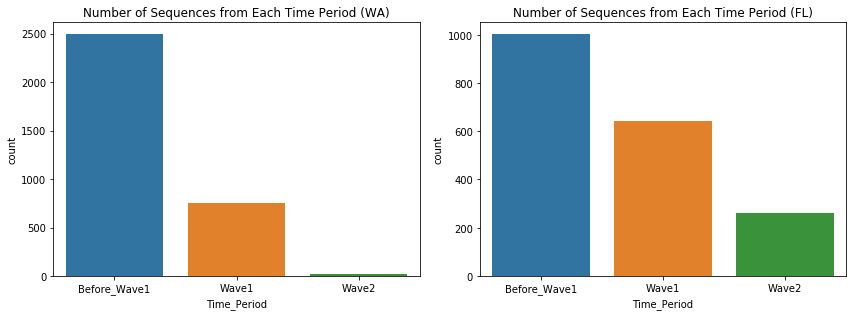

In [30]:
print("Washington:",WA_onehot['Time_Period'].value_counts(), sep='\n')
print()
print("Florida:",FL_onehot['Time_Period'].value_counts(), sep='\n')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4.5))
sns.countplot(data=WA_onehot, x = "Time_Period", ax=ax1).set_title("Number of Sequences from Each Time Period (WA)")
sns.countplot(data=FL_onehot, x = "Time_Period", ax=ax2).set_title("Number of Sequences from Each Time Period (FL)")

fig.tight_layout()

In [31]:
WA_onehot.head(3) #notice the many features due to 1-hot encoding each amino acid

,0,1,2,3,4,5,6,7,8,9,...,26725,26726,26727,26728,26729,26730,26731,26732,Collection_Date,Time_Period
QLJ57587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-01-01,Before_Wave1
QLJ57539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-01-01,Before_Wave1
QLJ57527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-01-01,Before_Wave1


## Amino Acid Sequence Clustering Across Infection Waves

In [32]:
#obtaining just the AA sequence features
WA_seq_features = WA_onehot.drop(columns=['Collection_Date','Time_Period'])
FL_seq_features = FL_onehot.drop(columns=['Collection_Date','Time_Period'])

In [33]:
#normalize the features
WA_normalized_ = preprocessing.normalize(WA_seq_features)
FL_normalized_ = preprocessing.normalize(FL_seq_features)
#changing from numpy array back to dataframe
WA_norm_seq_features = pd.DataFrame(WA_normalized_, index = WA_seq_features.index, columns = WA_seq_features.columns)
FL_norm_seq_features = pd.DataFrame(FL_normalized_, index = FL_seq_features.index, columns = FL_seq_features.columns)

## Washington Clustering

**Principal Component Analysis (PCA)**

In [34]:
#obtain two principal components from PCA
WA_pca = PCA(n_components=2, random_state=7)
WA_principalComponents = WA_pca.fit_transform(WA_norm_seq_features)

#arrange as dataframe
WA_pca_df = pd.DataFrame(data = WA_principalComponents, columns = ['Dimension 1', 'Dimension 2'])
WA_final_pca_df = WA_pca_df.set_index(WA_norm_seq_features.index)
#concatenate Time Period indications to dataframe
WA_final_pca_df = pd.concat([WA_final_pca_df, WA_onehot[['Time_Period']]], axis = 1)

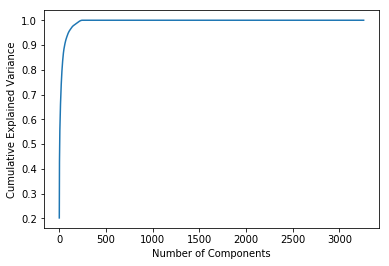

In [35]:
#plot percent of explained variance over number of principal components
pca = PCA(random_state = 7).fit(WA_norm_seq_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [36]:
np.cumsum(pca.explained_variance_ratio_)[100]

0.9517431960537756

*100 components can explain over 95% of the variance*

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [37]:
#using PCA to obtain 150 principal components before clustering
WA_pca_150 = PCA(n_components=150, random_state=7)
WA_tsne = TSNE(n_components=2, random_state=7, perplexity=30, n_iter=1000, learning_rate=200)
WA_tsne_res = WA_tsne.fit_transform(WA_pca_150.fit_transform(WA_norm_seq_features))

WA_tsne_df = pd.DataFrame(data = WA_tsne_res, columns = ['Dimension 1', 'Dimension 2'])
WA_tsne_df = WA_tsne_df.set_index(WA_norm_seq_features.index)
WA_final_tsne_df = pd.concat([WA_tsne_df, WA_onehot[['Time_Period']]], axis = 1)

**Uniform Manifold Approximation and Projection (UMAP)**

In [38]:
#using PCA to obtain 150 principal components before clustering
WA_umap = umap.UMAP(n_components=2, random_state=7, min_dist=0.6, n_neighbors=60)
WA_umap_res = WA_umap.fit_transform(WA_pca_150.fit_transform(WA_norm_seq_features))

WA_umap_df = pd.DataFrame(data = WA_umap_res, columns = ['Dimension 1', 'Dimension 2'])
WA_umap_df = WA_umap_df.set_index(WA_norm_seq_features.index)
WA_final_umap_df = pd.concat([WA_umap_df, WA_onehot[['Time_Period']]], axis = 1)

## Florida Clustering

**Principal Component Analysis (PCA)**

In [39]:
#obtain two principal components from PCA
FL_pca = PCA(n_components=2, random_state=7)
FL_principalComponents = FL_pca.fit_transform(FL_norm_seq_features)

#arrange as dataframe
FL_pca_df = pd.DataFrame(data = FL_principalComponents, columns = ['Dimension 1', 'Dimension 2'])
FL_final_pca_df = FL_pca_df.set_index(FL_norm_seq_features.index)
#concatenate Time Period indications to dataframe
FL_final_pca_df = pd.concat([FL_final_pca_df, FL_onehot[['Time_Period']]], axis = 1)

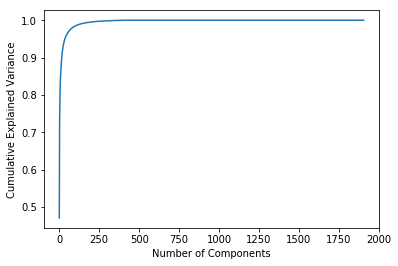

In [40]:
#plot percent of explained variance over number of principal components
pca = PCA(random_state=7).fit(FL_norm_seq_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [41]:
np.cumsum(pca.explained_variance_ratio_)[50]

0.9642998805925506

*50 components can explain over 95% of the variance*

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [42]:
#using PCA to obtain 50 principal components before clustering
pca_50 = PCA(n_components=50, random_state=7)
FL_tsne = TSNE(n_components=2, random_state=7, perplexity=30, n_iter=1000, learning_rate=200)
FL_tsne_res = FL_tsne.fit_transform(pca_50.fit_transform(FL_norm_seq_features))

FL_tsne_df = pd.DataFrame(data = FL_tsne_res, columns = ['Dimension 1', 'Dimension 2'])
FL_tsne_df = FL_tsne_df.set_index(FL_norm_seq_features.index)
FL_final_tsne_df = pd.concat([FL_tsne_df, FL_onehot[['Time_Period']]], axis = 1)

**Uniform Manifold Approximation and Projection (UMAP)**

In [43]:
#using PCA to obtain 150 principal components before clustering
FL_umap = umap.UMAP(n_components=2, random_state=7, min_dist=0.6, n_neighbors=70)
FL_umap_res = FL_umap.fit_transform(pca_50.fit_transform(FL_norm_seq_features))

FL_umap_df = pd.DataFrame(data = FL_umap_res, columns = ['Dimension 1', 'Dimension 2'])
FL_umap_df = FL_umap_df.set_index(FL_norm_seq_features.index)
FL_final_umap_df = pd.concat([FL_umap_df, FL_onehot[['Time_Period']]], axis = 1)

### Visualizing the Clusters
Points are colored to determine sequence similarities within and across each time period.

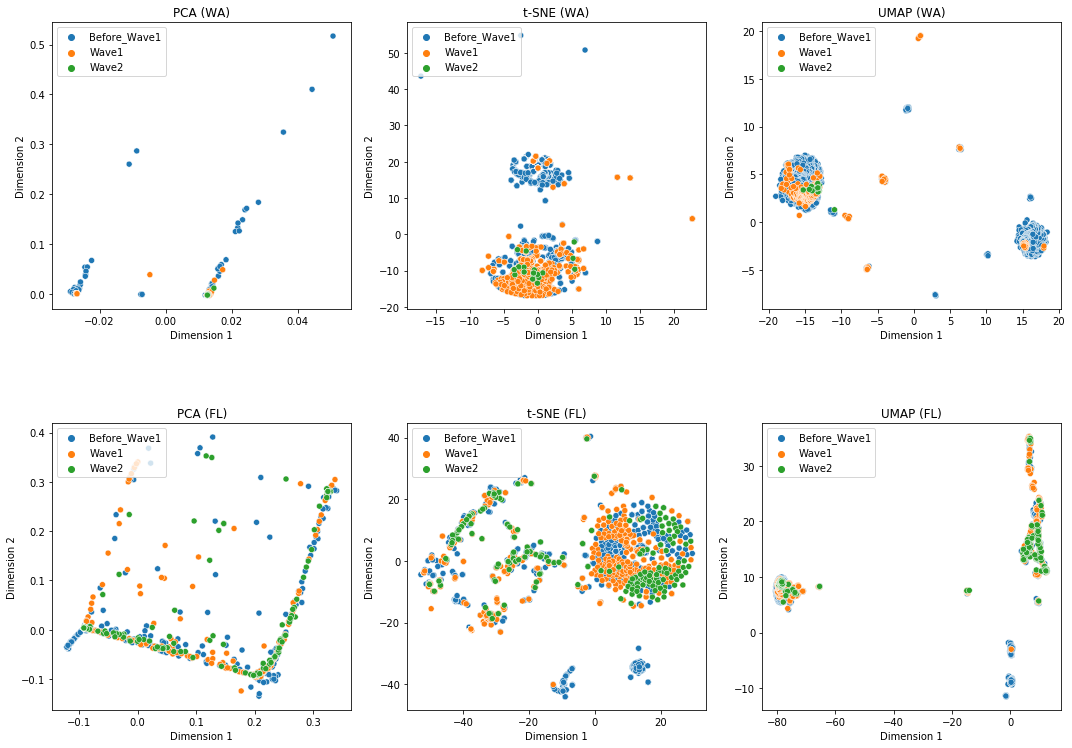

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (15,10.5))
sns.scatterplot(x="Dimension 1", y="Dimension 2", data=WA_final_pca_df, 
                hue="Time_Period", ax=ax1).set_title("PCA (WA)")
sns.scatterplot(x="Dimension 1", y="Dimension 2", data=WA_final_tsne_df, 
                hue="Time_Period", ax=ax2).set_title("t-SNE (WA)")
sns.scatterplot(x="Dimension 1", y="Dimension 2", data=WA_final_umap_df, 
                hue="Time_Period", ax=ax3).set_title("UMAP (WA)")

sns.scatterplot(x="Dimension 1", y="Dimension 2", data=FL_final_pca_df, 
                hue="Time_Period", ax=ax4).set_title("PCA (FL)")
sns.scatterplot(x="Dimension 1", y="Dimension 2", data=FL_final_tsne_df, 
                hue="Time_Period", ax=ax5).set_title("t-SNE (FL)")
sns.scatterplot(x="Dimension 1", y="Dimension 2", data=FL_final_umap_df, 
                hue="Time_Period", ax=ax6).set_title("UMAP (FL)")

fig.tight_layout()
plt.subplots_adjust(hspace = 0.4)
ax1.legend(prop={'size': 10}, loc="upper left")
ax2.legend(prop={'size': 10}, loc="upper left")
ax3.legend(prop={'size': 10}, loc="upper left")
ax4.legend(prop={'size': 10}, loc="upper left")
ax5.legend(prop={'size': 10}, loc="upper left")
ax6.legend(prop={'size': 10}, loc="upper left")

The unsupervised clustering models provide us with insight into the similarities of the amino acid sequences within and across the different waves in Washington and Florida. The clustering of sequences in Washington show two large, distinct clusters, with one slightly larger than the other. The smaller of the two clusters consists mostly of sequences collected before wave 1, while the larger cluster consists of sequences collected from all three time periods. This suggests that there was an initial grouping of SARS-CoV-2 surface glycoprotein amino acid sequences that was much different from the more recently collected sequences. The clear separation between the two clusters also suggests that the surface glycoprotein sequence has changed enough to clearly differentiate from the original surface glycoprotein at the start of the pandemic. <br><br>
The clusters in Florida are less distinct, suggesting that the surface glycoprotein has remained relatively similar throughout the three time periods. However, within the clusters, the coloring shows that sequences from the different time periods are grouped together. This may indicate that there is still a progression of mutations over time that is recognizable throughout the three time periods. <br><br>
In all, the results of the unsupervised clustering models show that there is structure in the changes over time of the surface glycoprotein amino acid sequence. This opens up many alleys for future work, including the utilization of time-series models to capture the behavior of the mutations over time to predict for subsequent mutations.